<a href="https://colab.research.google.com/github/ulyana2002/Python/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline


Загрузка обучающей и тестовой выборок 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Нормализация входных данных 

In [3]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям 

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

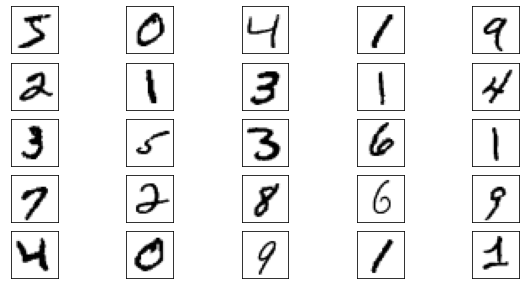

In [5]:
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Формирование модели НС и вывод ее структуры в консоль

In [6]:
from keras.api._v2.keras import activations
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Запуск процесса обучения: 80%-обучающая выборка, 20%-выборка валидации

In [8]:
model.fit(x_train,y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2812 - accuracy: 0.9197 - val_loss: 0.1481 - val_accuracy: 0.9571
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1250 - accuracy: 0.9632 - val_loss: 0.1168 - val_accuracy: 0.9646
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.0992 - val_accuracy: 0.9695
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0638 - accuracy: 0.9804 - val_loss: 0.0983 - val_accuracy: 0.9693
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.0953 - val_accuracy: 0.9722


In [9]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9724


[0.09076454490423203, 0.9724000096321106]

Проверка распознования цифр

1/1 [==============================] - 0s 23ms/step
[[1.8603178e-07 1.9519459e-09 3.8289520e-05 1.8016288e-04 2.6581168e-11
  3.4498775e-08 2.3160904e-11 9.9977928e-01 1.1985992e-06 8.1662415e-07]]
Распознанная цифра: 7


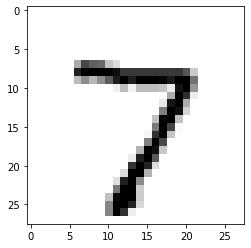

In [17]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознование всей тестовой выборки 

In [23]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных вариантов

In [24]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(276, 28, 28)


Вывод первых 5 неверных результатов

Значение сети:7


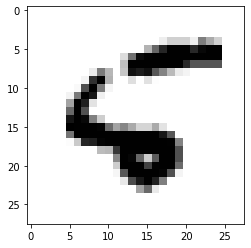

Значение сети:2


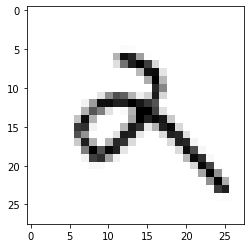

Значение сети:1


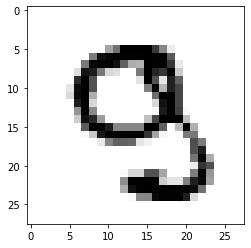

Значение сети:0


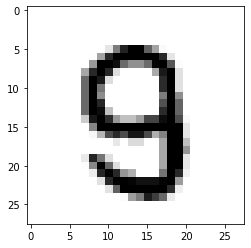

Значение сети:4


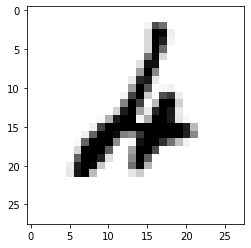

In [25]:
for i in range(5):
  print("Значение сети:" +str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

Урок был взять у @selfedu_rus